In [19]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib.animation import FuncAnimation, PillowWriter, ImageMagickWriter
from mpl_toolkits import mplot3d
from matplotlib import rcParams
import matplotlib.colors as colors
import copy
import math
import sys
from Src import *

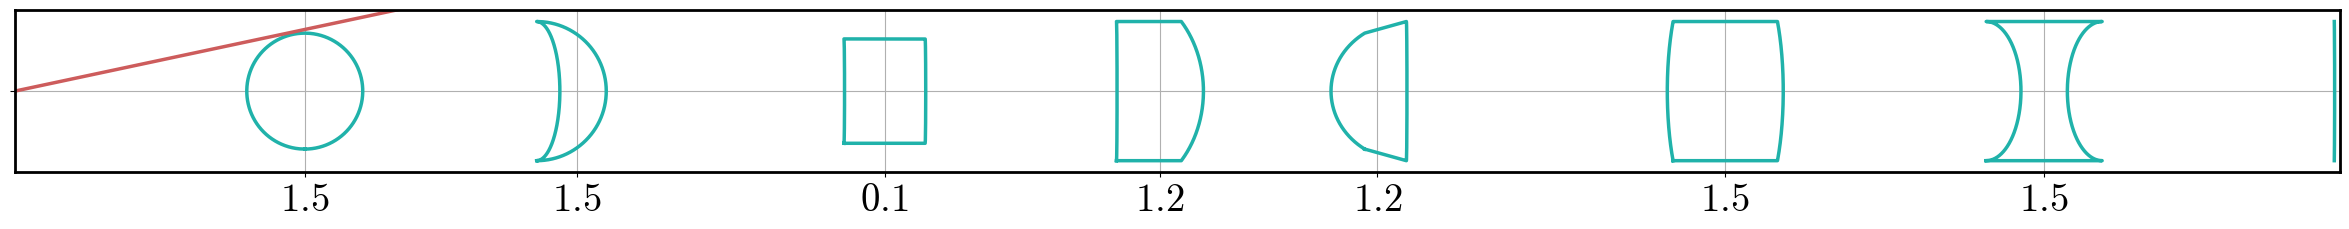

In [21]:
######################################################
###############     USER VARIABLES     ###############
######################################################
verbose = True
plotLenses = True
lens_parameters = [ [ ( -1.0, 1.0,  5.0, -1.2, 1.2 ), (  1.0, 1.0,  5.0, -1.2, 1.2 ), 1.5 ], # Lens: (r_x, r_y, x, y_min, y_max), (r_x, r_y, x, y_min, y_max),
                    [ (  0.4, 1.2,  9.0, -1.2, 1.2 ), (  1.2, 1.2,  9.0, -1.2, 1.2 ), 1.5 ], # Lens: (r_x, r_y, x, y_min, y_max), (r_x, r_y, x, y_min, y_max),
                    [ ( 1e-2, 0.9, 14.3, -0.9, 0.9 ), ( 1e-2, 0.9, 15.7, -0.9, 0.9 ), 0.1 ], # Lens: (r_x, r_y, x, y_min, y_max), (r_x, r_y, x, y_min, y_max),
                    [ ( 1e-2, 1.2, 19.0, -1.2, 1.2 ), (  1.5, 1.8, 19.0, -1.2, 1.2 ), 1.2 ], # Lens: (r_x, r_y, x, y_min, y_max), (r_x, r_y, x, y_min, y_max),
                    [ ( -1.3, 1.2, 24.0, -1.0, 1.0 ), ( 1e-2, 1.2, 24.0, -1.2, 1.2 ), 1.2 ], # Lens: (r_x, r_y, x, y_min, y_max), (r_x, r_y, x, y_min, y_max),
                    [ ( -0.5, 2.0, 29.0, -1.2, 1.2 ), (  0.5, 2.0, 30.0, -1.2, 1.2 ), 1.5 ], # Lens: (r_x, r_y, x, y_min, y_max), (r_x, r_y, x, y_min, y_max),
                    [ (  0.6, 1.2, 34.0, -1.2, 1.2 ), ( -0.6, 1.2, 36.0, -1.2, 1.2 ), 1.5 ], # Lens: (r_x, r_y, x, y_min, y_max), (r_x, r_y, x, y_min, y_max),
                    [ ( 1e-2, 1.3, 40.0, -1.2, 1.2 ), 1, [ -1.5, 1.5 ] ] ]                   # Final Surface: (r_x, r_y, x, y_min, y_max), n, [y_min, y_max]

theta_lim = [ -math.pi/15, math.pi/15, 100 ] # min, max, nPoints
phi_lim   = [ -math.pi/15, math.pi/15, 100 ] # min, max, nPoints
r = 0

nFrames = 200
nPoints = 1000
plotName = 'exampleLens'
nFrames_save = [274,286,304,140,139]


#######################################################
###############     PLOTTING SCRIPT     ###############
#######################################################

surfaces = []
lenses   = []
for nLens in range(len(lens_parameters)):
    if nLens != len(lens_parameters)-1:
        surfaces.append(surface(lens_parameters[nLens][0][0],lens_parameters[nLens][0][1],lens_parameters[nLens][0][2],
                                lens_parameters[nLens][0][3],lens_parameters[nLens][0][4],verbose=verbose))
        surfaces.append(surface(lens_parameters[nLens][1][0],lens_parameters[nLens][1][1],lens_parameters[nLens][1][2],
                                lens_parameters[nLens][1][3],lens_parameters[nLens][1][4],verbose=verbose))
        lenses.append(lens(surfaces[-2],surfaces[-1],lens_parameters[nLens][2],verbose)) 
    else:
        surfaces.append(surface(lens_parameters[nLens][0][0],lens_parameters[nLens][0][1],lens_parameters[nLens][0][2],
                                lens_parameters[nLens][0][3],lens_parameters[nLens][0][4],verbose=verbose))
OS = opticalSystem(lenses,surfaces[-1],lens_parameters[-1][1],verbose)

mpl.rc('font', **{'family' : 'serif', 'size' : 28 })
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['legend.fontsize' ] = 1

fig, ax = plt.subplots(figsize=(30,5))
ax.set_xlim(0,40.1)
ax.set_ylim(-1.4, 1.4)
thickness = 2
ax.spines['left'].set_linewidth(thickness)
ax.spines['bottom'].set_linewidth(thickness)
ax.spines['right'].set_linewidth(thickness)
ax.spines['top'].set_linewidth(thickness)
ax.set_aspect('equal')
ax.set_yticks([0])
ax.set_yticklabels([''])
ax.set_xticks([5, 9.7, 15, 19.75, 23.5, 29.5, 35])
ax.set_xticklabels(['$1.5$','$1.5$','$0.1$','$1.2$','$1.2$','$1.5$','$1.5$'])
# ax.set_yticks([-1, 0, 1])
# ax.set_yticklabels(['$-1$','$0$','$1$'])
# ax.set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40])
# ax.set_xticklabels(['$0$','$5$','$10$','$15$','$20$','$25$','$30$','$35$','$40$'])
ax.grid()

if plotLenses: surfaces_points = OS.get_points_lenses  (nPoints)
else         : surfaces_points = OS.get_points_surfaces(nPoints)
surfaces_plot = []
rays_plot     = []
if plotLenses:
    for nLens in range(len(lenses)+1):
        surfaces_plot.append(ax.plot([x for x,y in surfaces_points[nLens]], [y for x,y in surfaces_points[nLens]], color='lightseagreen', linewidth=2.5)[0])
for nSurface in range(len(surfaces)):
    if not plotLenses: surfaces_plot.append(ax.plot([x for x,y in surfaces_points[nSurface]], [y for x,y in surfaces_points[nSurface]], color='lightseagreen', linewidth=2.5)[0])
    if nSurface < len(surfaces):
        rays_plot.append(ax.plot([],[],color='indianred',linewidth=2.5)[0])
        
def updateFrame(nFrame):
    theta      = theta_lim[0] + ( theta_lim[1] - theta_lim[0] ) / (nFrames-1) * nFrame
    OR         = opticalRay(r,0.00,theta)
    RP         = rayPropagator(OS,OR,lens_parameters[-1][2])  
    points_ray = RP.propagateRay()
    points_ray_formatted = []
    for nPoint in range(len(points_ray)-1):
        points_ray_formatted.append(([points_ray[nPoint].x,points_ray[nPoint+1].x],[points_ray[nPoint].y,points_ray[nPoint+1].y]))
    
    for nRay in range(len(rays_plot)):
        rays_plot[nRay].set_data(points_ray_formatted[nRay][0], points_ray_formatted[nRay][1])
        
    if nFrame in nFrames_save:
        plt.savefig('Frames/'+plotName+'-'+str(nFrame)+'.pdf',bbox_inches='tight')
    
    return surfaces_plot[0], rays_plot[0]

animation = FuncAnimation(fig, updateFrame, frames=nFrames, interval=1, blit=True)

animation.save(plotName+'.gif', writer='pillow')
plt.show()

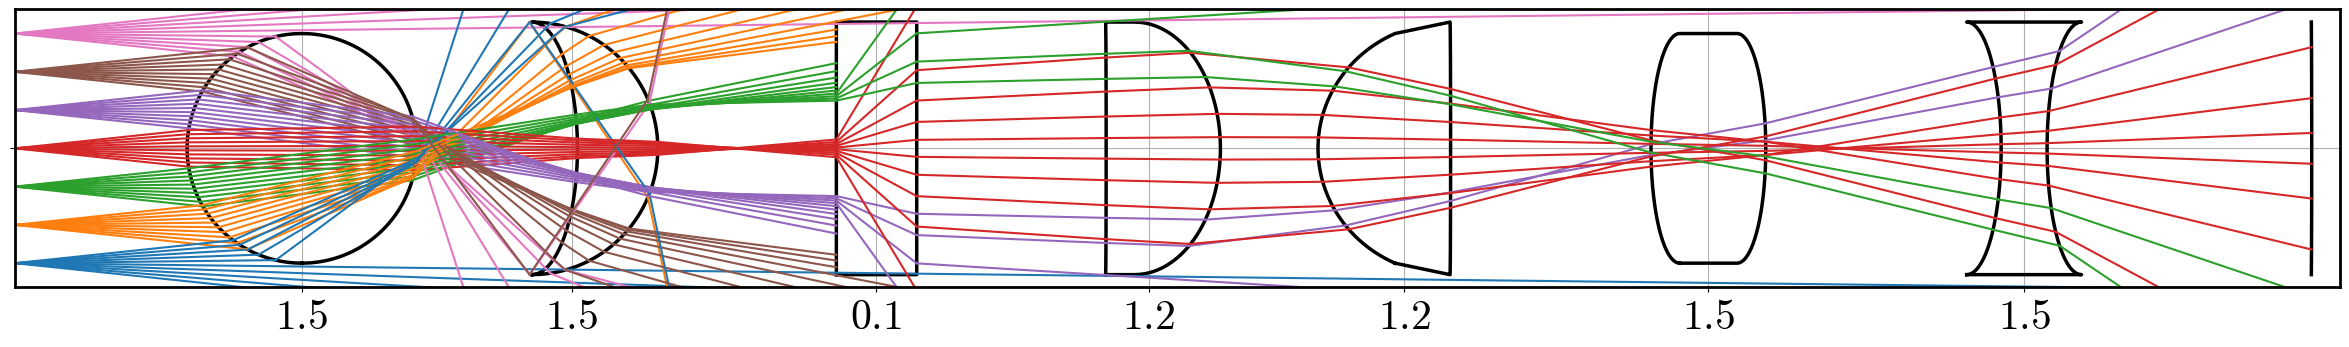

In [3]:
######################################################
###############     USER VARIABLES     ###############
######################################################
verbose = True
plotLenses = True
saveFrames = False
lens_parameters = [ [ ( -2.0, 2.0,  5.0, -2.2, 2.2 ), (  2.0, 2.0,  5.0, -2.2, 2.2 ), 1.5 ], # Lens: (r_x, r_y, x, y_min, y_max), (r_x, r_y, x, y_min, y_max),
                    [ (  0.8, 2.2,  9.0, -2.2, 2.2 ), (  2.2, 2.2,  9.0, -2.2, 2.2 ), 1.5 ], # Lens: (r_x, r_y, x, y_min, y_max), (r_x, r_y, x, y_min, y_max),
                    [ ( 1e-2, 25 , 14.3, -2.2, 2.2 ), ( 1e-2,  25, 15.7, -2.2, 2.2 ), 0.1 ], # Lens: (r_x, r_y, x, y_min, y_max), (r_x, r_y, x, y_min, y_max),
                    [ ( 1e-2, 2.2, 19.0, -2.2, 2.2 ), (  1.5, 2.2, 19.5, -2.2, 2.2 ), 1.2 ], # Lens: (r_x, r_y, x, y_min, y_max), (r_x, r_y, x, y_min, y_max),
                    [ ( -2.3, 2.2, 25.0, -2.0, 2.0 ), ( 1e-2, 2.2, 25.0, -2.2, 2.2 ), 1.2 ], # Lens: (r_x, r_y, x, y_min, y_max), (r_x, r_y, x, y_min, y_max),
                    [ ( -0.5, 2.0, 29.0, -2.2, 2.2 ), (  0.5, 2.0, 30.0, -2.2, 2.2 ), 1.5 ], # Lens: (r_x, r_y, x, y_min, y_max), (r_x, r_y, x, y_min, y_max),
                    [ (  0.6, 2.2, 34.0, -2.2, 2.2 ), ( -0.6, 2.2, 36.0, -2.2, 2.2 ), 1.5 ], # Lens: (r_x, r_y, x, y_min, y_max), (r_x, r_y, x, y_min, y_max),
                    [ ( 1e-2, 2.3, 40.0, -2.2, 2.2 ), 1, [ -2.5, 2.5 ] ] ]                   # Final Surface: (r_x, r_y, x, y_min, y_max), n, [y_min, y_max]

theta_lim = [ -math.pi/30, math.pi/30, 10 ] # min, max, nPoints
y_lim     = [ -2       ,        2, 7 ] # min, max, nPoints
# phi_lim   = [ -math.pi/14, math.pi/14, 5 ] # min, max, nPoints
r         = 0

singleRayAnimation = False
nFrames = theta_lim[2]*y_lim[2]
nPoints = 1000
plotName = 'DPSDtestLens'
nFrames_save = [274,286,304,140]
rayThickness = 1.5
lensColor = 'black' #'lightseagreen'

#######################################################
###############     PLOTTING SCRIPT     ###############
#######################################################

surfaces = []
lenses   = []
for nLens in range(len(lens_parameters)):
    if nLens != len(lens_parameters)-1:
        surfaces.append(surface(lens_parameters[nLens][0][0],lens_parameters[nLens][0][1],lens_parameters[nLens][0][2],
                                lens_parameters[nLens][0][3],lens_parameters[nLens][0][4],verbose=verbose))
        surfaces.append(surface(lens_parameters[nLens][1][0],lens_parameters[nLens][1][1],lens_parameters[nLens][1][2],
                                lens_parameters[nLens][1][3],lens_parameters[nLens][1][4],verbose=verbose))
        lenses.append(lens(surfaces[-2],surfaces[-1],lens_parameters[nLens][2],verbose)) 
    else:
        surfaces.append(surface(lens_parameters[nLens][0][0],lens_parameters[nLens][0][1],lens_parameters[nLens][0][2],
                                lens_parameters[nLens][0][3],lens_parameters[nLens][0][4],verbose=verbose))
OS = opticalSystem(lenses,surfaces[-1],lens_parameters[-1][1],verbose)

mpl.rc('font', **{'family' : 'serif', 'size' : 30 })
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['legend.fontsize' ] = 1

fig, ax = plt.subplots(figsize=(30,5))
ax.set_xlim(0,40.5)
# ax.set_ylim(-1.4, 1.4)
thickness = 2
ax.spines['left'].set_linewidth(thickness)
ax.spines['bottom'].set_linewidth(thickness)
ax.spines['right'].set_linewidth(thickness)
ax.spines['top'].set_linewidth(thickness)
ax.grid()
ax.set_aspect('equal')
ax.set_yticks([0])
ax.set_yticklabels([''])
ax.set_xticks([5, 9.7, 15, 19.75, 24.2, 29.5, 35])
ax.set_xticklabels(['$1.5$','$1.5$','$0.1$','$1.2$','$1.2$','$1.5$','$1.5$'])

if plotLenses: surfaces_points = OS.get_points_lenses  (nPoints)
else         : surfaces_points = OS.get_points_surfaces(nPoints)
surfaces_plot = []
rays_plot     = []
backPlanePoints = []
if not singleRayAnimation:
    for nTheta in range(theta_lim[2]):
        rays_plot.append([])
        for nY in range(y_lim[2]):
            rays_plot[nTheta].append([])
if plotLenses:
    for nLens in range(len(lenses)+1):
        surfaces_plot.append(ax.plot([x for x,y in surfaces_points[nLens]], [y for x,y in surfaces_points[nLens]], color=lensColor, linewidth=2.5)[0])
for nSurface in range(len(surfaces)):
    if not plotLenses: surfaces_plot.append(ax.plot([x for x,y in surfaces_points[nSurface]], [y for x,y in surfaces_points[nSurface]], color=lensColor, linewidth=2.5)[0])
    if nSurface < len(surfaces):
        if not singleRayAnimation:
            for nRays in range(len(rays_plot)):
                for nRay in range(len(rays_plot[nRays])):
                    rays_plot[nRays][nRay].append(ax.plot([],[],linewidth=rayThickness,color=mpl.rcParams['axes.prop_cycle'].by_key()['color'][nRay])[0])
        else:
            rays_plot.append(ax.plot([],[],color='indianred',linewidth=rayThickness)[0])
        
if singleRayAnimation:
    def updateFrame(nFrame):
        nFrame_theta = nFrame // y_lim[2]
        nFrame_y     = nFrame - nFrame_theta * y_lim[2]

        theta      = theta_lim[0] + ( theta_lim[1] - theta_lim[0] ) / (theta_lim[2]-1) * nFrame_theta
        y          = y_lim[0] + (y_lim[1] - y_lim[0])/(y_lim[2]-1)*nFrame_y
        OR         = opticalRay(r,y,theta)
        RP         = rayPropagator(OS,OR,lens_parameters[-1][2])  
        points_ray = RP.propagateRay()
        points_ray_formatted = []
        for nPoint in range(len(points_ray)-1):
            points_ray_formatted.append(([points_ray[nPoint].x,points_ray[nPoint+1].x],[points_ray[nPoint].y,points_ray[nPoint+1].y]))
        
        for nRay in range(len(rays_plot)):
            rays_plot[nRay].set_data(points_ray_formatted[nRay][0], points_ray_formatted[nRay][1])

        if saveFrames and nFrame in nFrames_save:
            plt.savefig('Frames/'+plotName+'-'+str(nFrame)+'.pdf',bbox_inches='tight')

        return surfaces_plot[0], rays_plot[0]

    animation = FuncAnimation(fig, updateFrame, frames=nFrames, interval=1, blit=True)

    animation.save(plotName+'.gif', writer='pillow')
else:
    for nFrame in range(nFrames):
        nFrame_theta = nFrame // y_lim[2]
        nFrame_y     = nFrame - nFrame_theta * y_lim[2]

        theta      = theta_lim[0] + ( theta_lim[1] - theta_lim[0] ) / (theta_lim[2]-1) * nFrame_theta
        y          = y_lim[0] + (y_lim[1] - y_lim[0])/(y_lim[2]-1)*nFrame_y
        OR         = opticalRay(r,y,theta)
        RP         = rayPropagator(OS,OR,lens_parameters[-1][2])  
        points_ray = RP.propagateRay()
        points_ray_formatted = []
        for nPoint in range(len(points_ray)-1):
            points_ray_formatted.append(([points_ray[nPoint].x,points_ray[nPoint+1].x],[points_ray[nPoint].y,points_ray[nPoint+1].y]))
        backPlanePoints.append((theta, points_ray_formatted[-1][1]))
        # print(points_ray_formatted)

        for nRay in range(len(rays_plot[nFrame_theta][nFrame_y])):
            rays_plot[nFrame_theta][nFrame_y][nRay].set_data(points_ray_formatted[nRay][0], points_ray_formatted[nRay][1])
            
plt.savefig('exampleLens.pdf',bbox_inches='tight')
plt.show()